## Help International Clustering and PCA Assignment

#Problem Statement: HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

#Business Goal:- Categorise the given countries using some socio-economic and health factors that determine the overall development of the country. Then  suggest the countries which the CEO needs to focus on the most. The datasets containing those socio-economic factors and the corresponding data dictionary are provided. 

## Step 1: Reading and Understanding the Data

In [1]:
# Suppress Warnings

import warnings
warnings.filterwarnings('ignore')



In [2]:
# Let us first import NumPy and Pandas and read the countries data set
# Importing currently  required packages
import numpy as np
import pandas as pd


In [41]:
# Reading the given data set Country-data.csv into a data frame countries_df.
# The data set Country-data.csv should be placed in the same folder as the ipynb file
countries_df = pd.read_csv('Data Set/Country-data.csv')
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
countries_df.info()
countries_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


(167, 10)

In [5]:
# As we can see there are no null values so we dont need to worry about missing values or nulls

# Checking columns
countries_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [6]:
# Inspecting if any of the columns has only one unique value
print(countries_df.child_mort.unique())
print(countries_df.exports.unique())
print(countries_df.health.unique())
print(countries_df.imports.unique())
print(countries_df.income.unique())
print(countries_df.inflation.unique())
print(countries_df.life_expec.unique())
print(countries_df.total_fer.unique())
print(countries_df.gdpp.unique())


[ 90.2  16.6  27.3 119.   10.3  14.5  18.1   4.8   4.3  39.2  13.8   8.6
  49.4  14.2   5.5   4.5  18.8 111.   42.7  46.6   6.9  52.5  19.8  10.5
  10.8 116.   93.6  44.4 108.    5.6  26.5 149.  150.    8.7  15.7  18.6
  88.2  63.9  10.2   3.6   3.4   4.1  34.4  25.1  29.1  19.2  55.2  24.1
   3.    4.2  63.7  80.3  16.5  74.7   3.9  14.6  35.4 109.  114.   37.6
 208.    6.    2.6  58.8  33.3  19.3  36.9   4.6   4.    3.2  21.1  21.5
  62.2  62.7  29.6  78.9   7.8  99.7  89.3   6.1   2.8  10.4  90.5   7.9
  13.2 137.    6.8  97.4  15.   40.   17.2  26.1  33.5 101.   64.4  56.
  47.    6.2 123.  130.   11.7  92.1  19.7  20.3  31.9   9.   11.5  10.
  63.6  18.9  66.8   7.6  14.4 160.    7.   28.1  53.7   3.8  11.2  20.7
  76.7  52.4  71.9  14.9  62.6  90.3  17.4  19.1  62.   81.    5.2   7.3
  10.6  36.3  29.2  17.1  23.3  56.3  83.1]
[1.00e+01 2.80e+01 3.84e+01 6.23e+01 4.55e+01 1.89e+01 2.08e+01 1.98e+01
 5.13e+01 5.43e+01 3.50e+01 6.95e+01 1.60e+01 3.95e+01 5.14e+01 7.64e+01
 5.82e+01

In [7]:
# All the columns have multiple unique values

# Now let's check if there are any nulls in the data set
# The isnull() function finds the rows ( axis =0 ) as null for columns and sum() 
# function sums up row values for each column 
print(countries_df.isnull().sum(axis=0))

# Now let's check if there are any nulls in the data set
# The isnull() function finds the columns ( axis =1) as null for row and sum() 
# function sums up row values for each column 
print(countries_df.isnull().sum(axis=0))


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [8]:
# We dont have any null values or missing values

# Checking for duplicate Rows
# Create a table of those culprit rows which are duplicated:
dups = countries_df.groupby(countries_df.columns.tolist()).size().reset_index().\
       rename(columns={0:'count'})

# sum the final col of that table, and subtract the number of culprits:
dups['count'].sum() - dups.shape[0]

# We donot have any duplicate rows as well.

0

In [9]:
# Treating the Outliers if any
countries_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

import seaborn as sns
sns.boxplot(x=countries_df['income'])


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


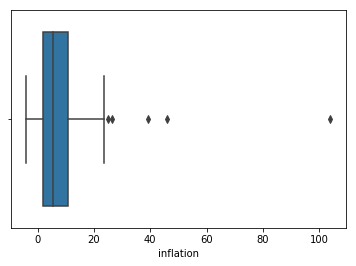

In [10]:
# The 75th quantile and max value are way apart for gdpp, income and inflation
sns.boxplot(x=countries_df['inflation'])

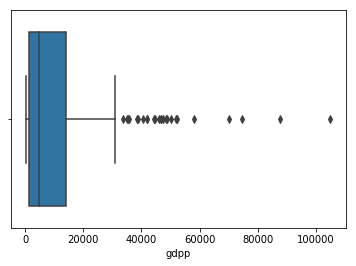

In [11]:
sns.boxplot(x=countries_df['gdpp'])

In [12]:
# We can observe that there are certain outliers in income,inflation and gdpp 
# But,treating lower outliers for variables like gdpp and income  will also remove
# countries that we would want to keep in our analysis. Also, removal of higher outliers
# for variables like inflation will result in removal of highly underdeveloped countries 
# that are crucial for our analysis. So we will only remove the top 5 quantile from
# gdpp and income. Since there are only higher outliers for inflation and removing them 
# will also remove countries that we would want to keep in our analysis, we wont treat 
# inflation higher outliers
# We are doing the outlier removal before PCA because doing it after PCA removes 
# around 50% of data which results in only 92 countries and is very detrimental for our 
# analysis. 

# We will now treat outliers for income
q95_income = countries_df.income.quantile(0.95)

# Removing the top 5 % quantile outliers
countries_df = countries_df.loc[countries_df.income< q95_income]

# We will now treat outliers for gdpp
q95_gdpp = countries_df.gdpp.quantile(0.95)

# Removing the top 5 % quantile outliers
countries_df = countries_df.loc[countries_df.gdpp< q95_gdpp]



#####  So now data is clean. We also analysed this data in excel to get a feel of any corrupt values but we did not find any

## Step 2: Visualising the Data

In [13]:
# Let's now spend some time visualising the data.
# We'll visualise our data using matplotlib and seaborn.
# Let's make a pairplot of all the numeric variables
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

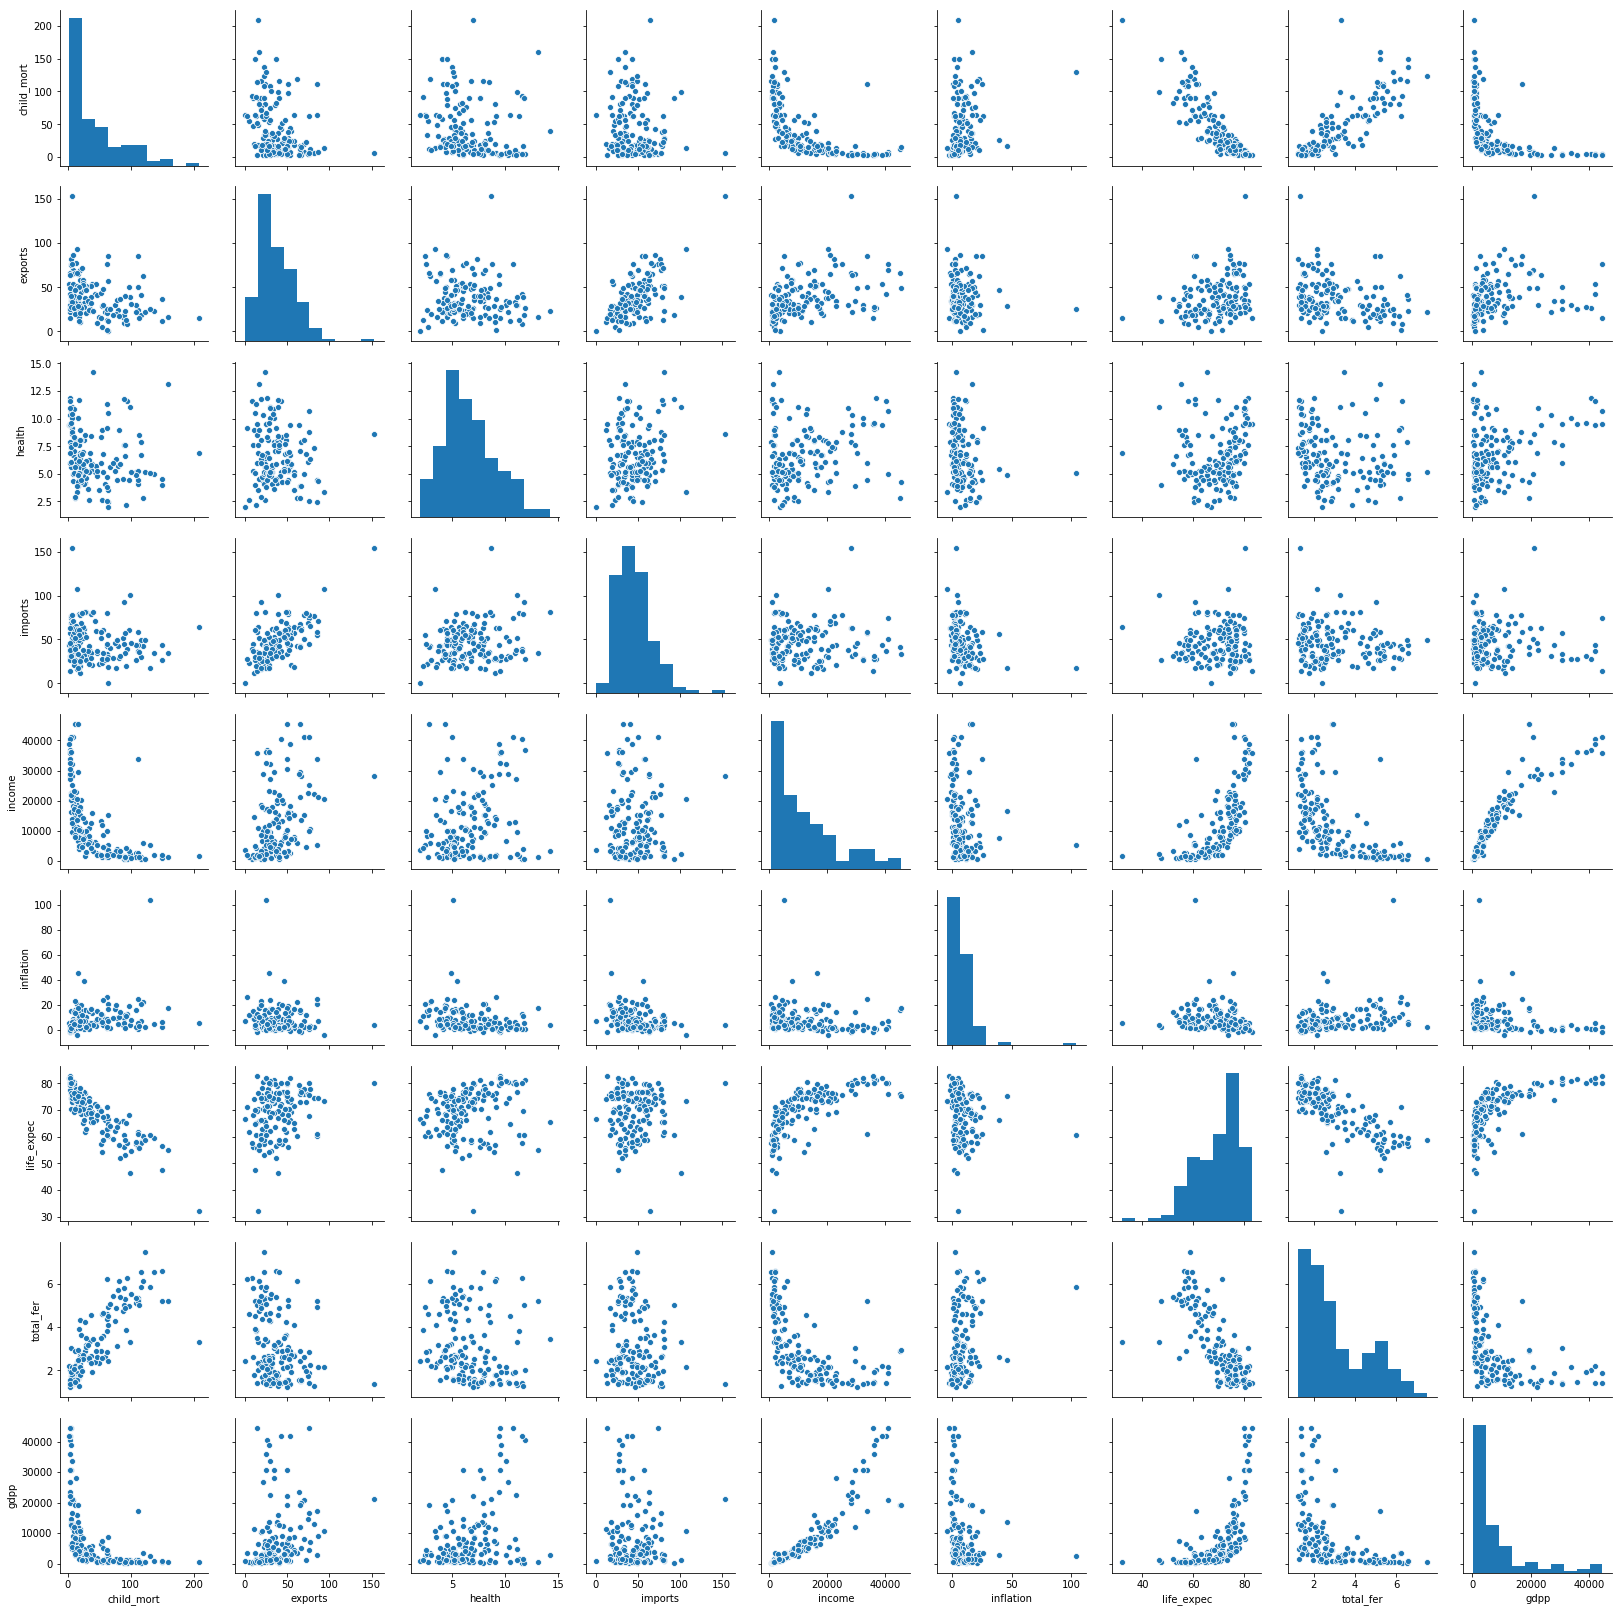

In [14]:
sns.pairplot(countries_df)
plt.show()

#### Visualising Categorical Variables
We donot have any categorical variables so we can skip this step


##### New Metric Derivation

We dont have any new variables to be derived in this task hence, skipping it.

## Step 3: PCA

#### Data Preparation

In [15]:
#  We have all variables except the country variable as numeric values. Country variable 
# is unique for each row so it does not make sense to convert into dummy variable and rather 
# it would make more sense so drop it

countries_pca_df = countries_df.drop(columns=['country'])
# Reset index will make sure the indexing is done from 0. this is required because outlier
# treatment deleted certain rows.
countries_df.reset_index(inplace=True)
countries_df.drop(columns=['index'],inplace=True)
print(countries_pca_df)

     child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2    10.00    7.58     44.9    1610      9.440        56.2   
1          16.6    28.00    6.55     48.6    9930      4.490        76.3   
2          27.3    38.40    4.17     31.4   12900     16.100        76.5   
3         119.0    62.30    2.85     42.9    5900     22.400        60.1   
4          10.3    45.50    6.03     58.9   19100      1.440        76.8   
5          14.5    18.90    8.10     16.0   18700     20.900        75.8   
6          18.1    20.80    4.40     45.3    6700      7.770        73.3   
9          39.2    54.30    5.88     20.7   16000     13.800        69.1   
10         13.8    35.00    7.89     43.7   22900     -0.393        73.8   
11          8.6    69.50    4.97     50.9   41100      7.440        76.0   
12         49.4    16.00    3.52     21.8    2440      7.140        70.4   
13         14.2    39.50    7.97     48.7   15300      0.321        76.7   
14          

#### Preprocessing :- Rescaling the Features
it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then PCA may be dominated by variables having large scale of vlauesl ike gdpp and income. 

We will apply StandardScaler scaling as it is the recommended practice for PCA.
https://stats.stackexchange.com/questions/235882/pca-in-numpy-and-sklearn-produces-different-results

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply scaler() to all the numeric columns 
num_vars = ['child_mort','exports','health','imports','income','inflation','life_expec',
'total_fer','gdpp']

countries_pca_df[num_vars] = scaler.fit_transform(countries_pca_df[num_vars])


In [17]:
# Looking at the normalised frame 
print( countries_pca_df.head())
print(countries_pca_df.describe())

   child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.182131 -1.293295  0.385135 -0.052260 -0.950849   0.111309   -1.526556   
1   -0.622475 -0.459787 -0.032638  0.123773 -0.213364  -0.342874    0.786640   
2   -0.360120  0.021795 -0.997976 -0.694544  0.049897   0.722390    0.809657   
3    1.888282  1.128508 -1.533374 -0.147413 -0.570583   1.300441   -1.077727   
4   -0.776945  0.350568 -0.243552  0.613813  0.599465  -0.622723    0.844183   

   total_fer      gdpp  
0   1.783595 -0.737218  
1  -0.928083 -0.393839  
2  -0.121733 -0.357918  
3   2.004691 -0.448205  
4  -0.615948  0.393497  
         child_mort       exports        health       imports        income  \
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02   
mean  -1.376677e-16  2.547037e-16  2.338870e-16  1.828167e-16  3.478699e-17   
std    1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00   
min   -9.657421e-01 -1.751308e+00 -1.890305e+00 -2.18

<Figure size 1440x1440 with 0 Axes>

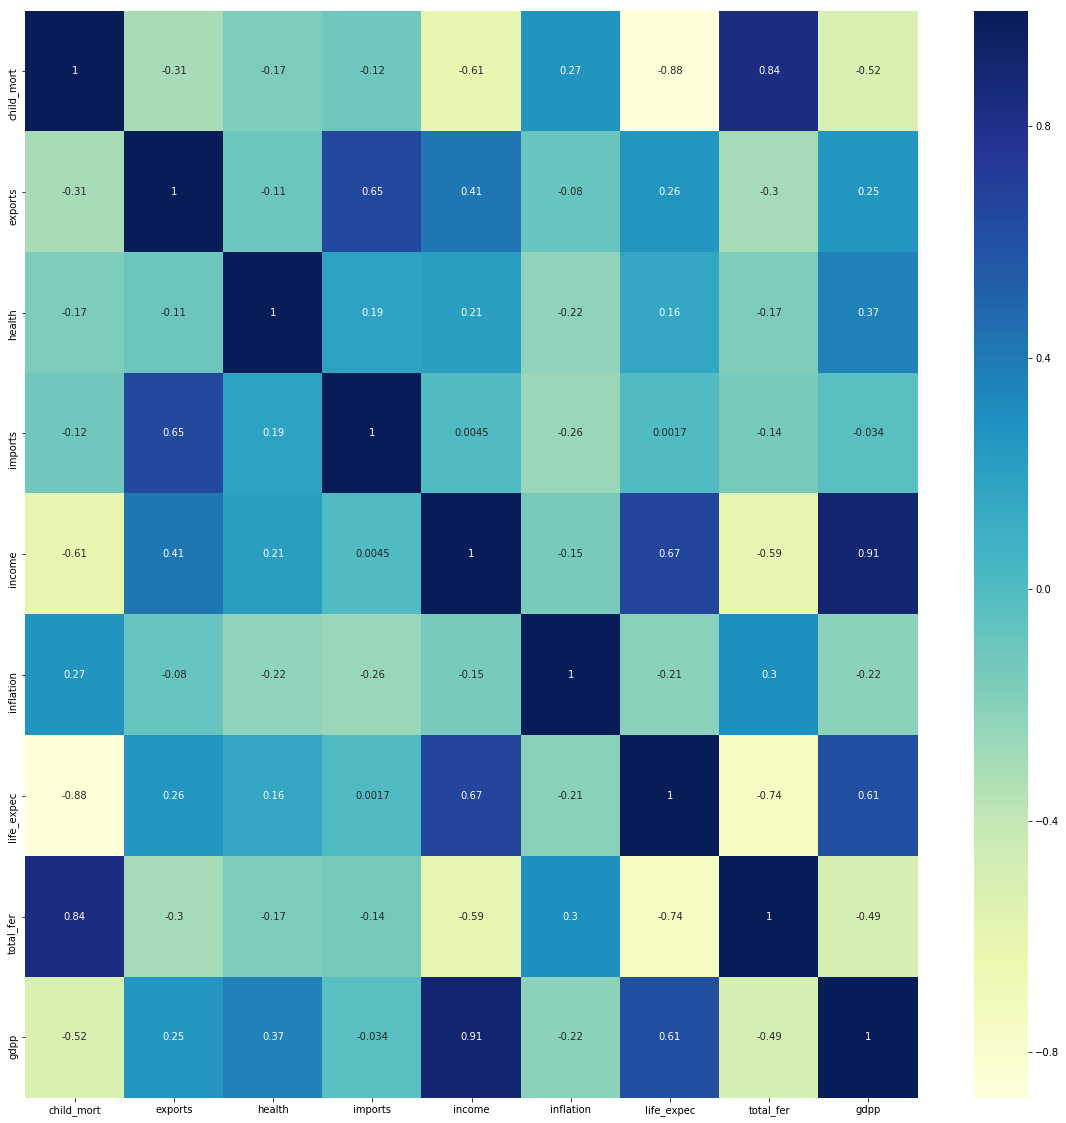

In [18]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(countries_pca_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [19]:
# Now, we will run PCA to get the components
# Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

#Applying PCA on the dataset
pca.fit(countries_pca_df)

# printing the components loading factor
pca.components_


PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

array([[-0.43332544,  0.22827506,  0.15640419,  0.10364354,  0.42156685,
        -0.17960225,  0.43105446, -0.41572454,  0.39535412],
       [ 0.06005128,  0.57745009, -0.03702285,  0.73540687, -0.12908916,
        -0.19744273, -0.16193099,  0.02429963, -0.19568221],
       [-0.11185137,  0.34162209, -0.73586763, -0.13228077,  0.10642721,
         0.51606488,  0.13918283, -0.07048596, -0.09896675],
       [ 0.32841794,  0.2481068 ,  0.3167266 ,  0.05494653,  0.38820289,
         0.47646116, -0.19458708,  0.33647673,  0.44547993],
       [-0.26815245, -0.0911074 ,  0.46561286,  0.20307399, -0.2809294 ,
         0.64081935,  0.17194626, -0.22004531, -0.30692524],
       [ 0.1925944 , -0.03458648, -0.01169815, -0.05442866,  0.13602594,
         0.06772201, -0.60676638, -0.75321305,  0.00521382],
       [ 0.0394481 , -0.62611992, -0.33399586,  0.61195392,  0.06331879,
         0.13605546,  0.04563321, -0.01114849,  0.30927305],
       [ 0.73882534,  0.07852413,  0.01805608, -0.0112575 , -0

Text(0.5,0,'Principal Component 1')

Text(0,0.5,'Principal Component 2')

Text(-0.433325,0.0600513,'child_mort')

Text(0.228275,0.57745,'exports')

Text(0.156404,-0.0370229,'health')

Text(0.103644,0.735407,'imports')

Text(0.421567,-0.129089,'income')

Text(-0.179602,-0.197443,'inflation')

Text(0.431054,-0.161931,'life_expec')

Text(-0.415725,0.0242996,'total_fer')

Text(0.395354,-0.195682,'gdpp')

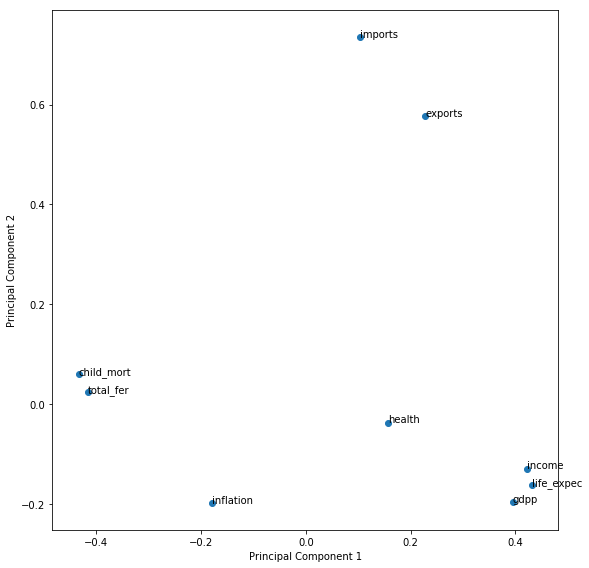

In [20]:
# Let's try to visualise PC1 and PC2 in terms of original features
colnames = list(countries_pca_df.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})

fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()



In [21]:
# We see that the fist component is in the direction where the "gdpp", "income" and
# "life_expec" is. The second Component captures imports, exports, health and child
# mortality

# Let's check the variance explained
pca.explained_variance_ratio_

array([0.45556905, 0.17339353, 0.13138016, 0.10394872, 0.07453334,
       0.02700104, 0.01766628, 0.01006533, 0.00644255])

Text(0.5,0,'number of components')

Text(0,0.5,'cumulative explained variance')

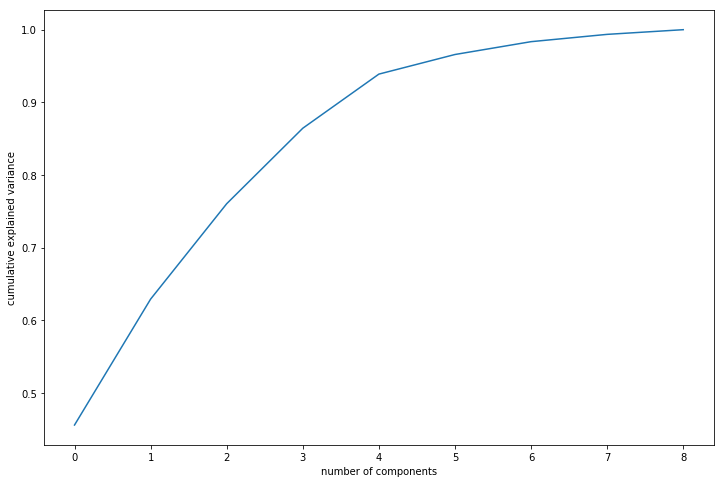

In [22]:
# Now let's visualise the cumulative explained variance using a Scree Plot

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [23]:
# From the plot it makes sense to choose either  4,5 or 6 components as they explain 85%+
# variance. Since we have been advised by TAs to choose less than 5, we will choose 4

# Using PCA. No need for Incremental PCA as it is not a large data set
from sklearn.decomposition import PCA
pca_final = PCA(n_components=4)
countries_pca = pca_final.fit_transform(countries_pca_df)



##### Creating correlation matrix for the principal components - we expect little to no correlation

<Figure size 1440x720 with 0 Axes>

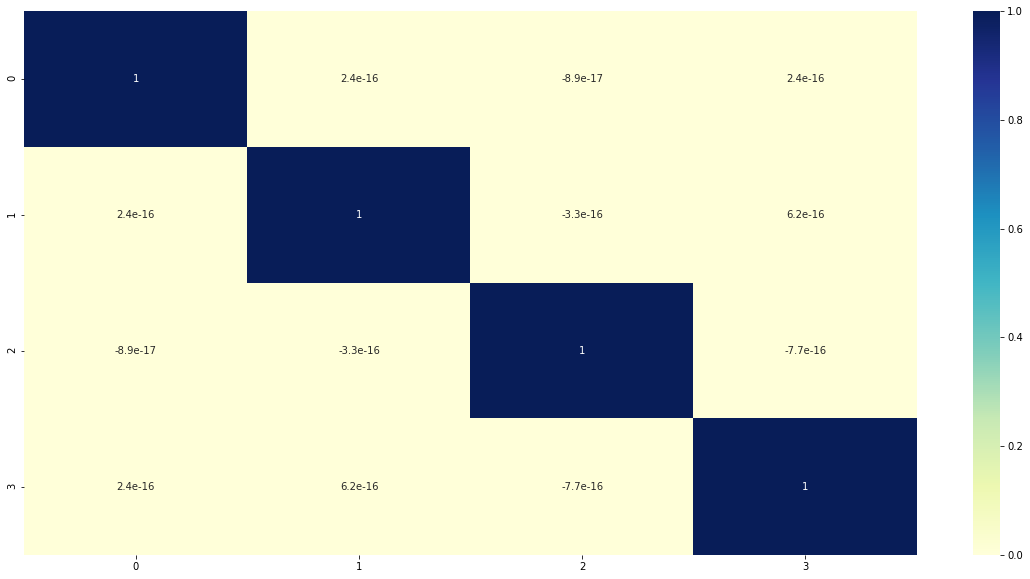

In [24]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(countries_pca.transpose())
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True,cmap="YlGnBu")

In [25]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 6.161238412425777e-16 , min corr:  -7.724280221736498e-16


In [26]:
# Now with the obtained components form a new dataframe

pca_final_df = pd.DataFrame({'PC1':countries_pca[:,0],'PC2':countries_pca[:,1],'PC3':countries_pca[:,2], \
                       'PC4':countries_pca[:,3]})
print(pca_final_df.shape)

# We will concatenate the countries with the final components obtained as it will help
# in visualisation later
pca_with_countries_df = pd.concat([countries_df['country'],pca_final_df], axis=1)



(150, 4)


## Step 4: Clustering

#### Cluster Tendency

In [27]:
# Analysing cluster Tendency of data set 

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

#Let's check the Hopkins measure
hopkins(pca_final_df)

0.85696862837573

##### Since Hopkins Statistics gives a score above the score 0.7 of cluster tendency we can go ahead with clustering

## Step 4 (a) :  K - Means Clustering 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=11, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=13, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=14, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

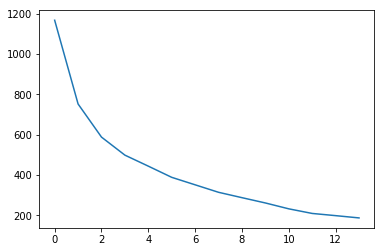

In [28]:
# With the new obtained components we will do K-Means Clustering 

# To perform K-Means clustering we first need to find a suitable value for K.

# To find this value we first plot the elbow curve for different values of K.
from sklearn.cluster import KMeans
ssd = []
for num_clusters in list(range(1,15)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pca_final_df)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

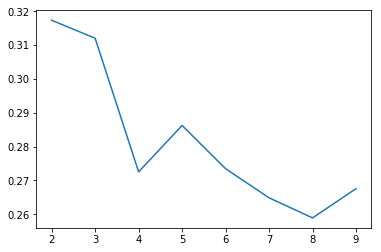

In [48]:
# This does not give a very clear picture as to whether to chose 2,3,4 or 5
# Next we do Silhouette analysis to get a better understanding
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(pca_final_df)
    sse_.append([k, silhouette_score(pca_final_df, kmeans.labels_)])

plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [46]:
# From the silhouette analysis method we see that 2 or 3 could be the right value of clusters.
# We could cluster countries into Under Developed, Developing and 
# Developed Countries based on problem statisitcs, so lcuster vlaue of 3 makes sense. 

# Applying K-means Clustering for 3 clusters

#  In order to keep the cluster ID constant for each run we define our own randomised init 
# array and pass it to K-Means. The documentation says if an ndarray is passed, it should
# be of shape (n_clusters, n_features). 
km_init = init = np.array([[-0.12, 0.939, 0.321, 0.011],
                     [0.0, 0.033, 0.12, 0.939],
                     [-0.6, 0.124, -0.2030, 0.939]],
                    np.float64)
model_clus = KMeans(n_clusters = 3,init=km_init, max_iter=50)
model_clus.fit(pca_final_df)

# Concatenating the PCA Components array having countries with Cluster IDs
countries_km = pd.concat([pca_with_countries_df,pd.Series(model_clus.labels_)], axis=1)
countries_km.columns = ['Country','PC1', 'PC2', 'PC3','PC4','ClusterID']
countries_km


KMeans(algorithm='auto', copy_x=True,
    init=array([[-0.12 ,  0.939,  0.321,  0.011],
       [ 0.   ,  0.033,  0.12 ,  0.939],
       [-0.6  ,  0.124, -0.203,  0.939]]),
    max_iter=50, n_clusters=3, n_init=10, n_jobs=1,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

,Country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.864467,-0.192951,-1.159519,0.439151,2
1,Albania,0.713339,-0.188278,-0.065577,-1.209035,0
2,Algeria,0.082353,-0.695965,1.408782,-0.461504,0
3,Angola,-2.764994,0.841242,1.685616,1.489061,2
4,Antigua and Barbuda,1.582302,0.433099,0.169092,-0.471811,0
5,Argentina,0.653232,-2.093503,0.297853,0.239892,1
6,Armenia,0.100852,-0.411163,0.562205,-1.493948,0
7,Azerbaijan,0.281548,-0.550783,1.017633,0.027977,0
8,Bahamas,2.179973,-0.661053,-0.704532,0.377001,1
9,Bahrain,2.749026,0.301828,1.315933,1.044564,1


##### Visualising the Components 

Let's first visualise the first and second Components from PCA

<Figure size 1080x720 with 0 Axes>

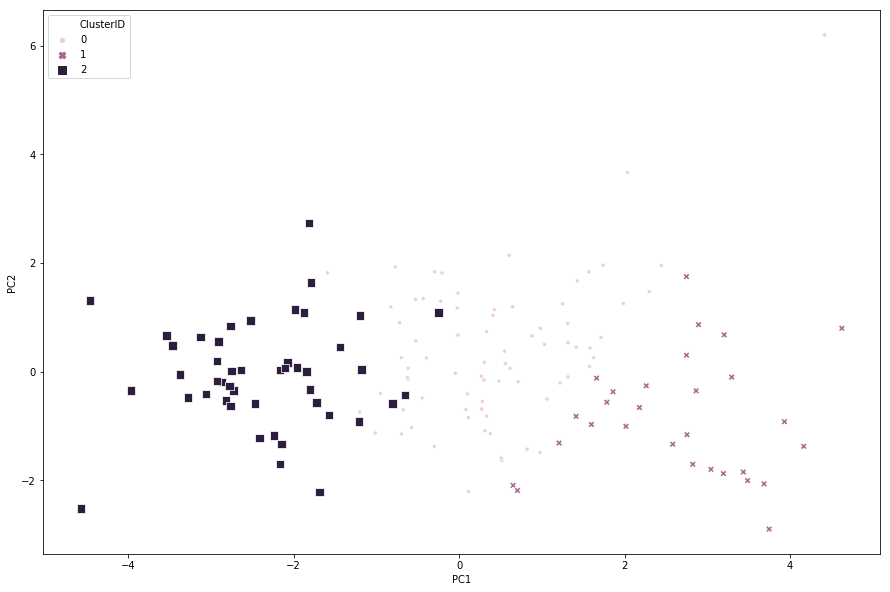

In [31]:
# First Component and Second componnet with Cluster ID

plt.figure(figsize=(15,10))
plot1 = sns.scatterplot(x=countries_km.PC1, y=countries_km.PC2, hue=countries_km.ClusterID,size=countries_km.ClusterID,style=countries_km.ClusterID)


We get a decent separation of clusters with KMeans for the various countries

<Figure size 1440x2880 with 0 Axes>

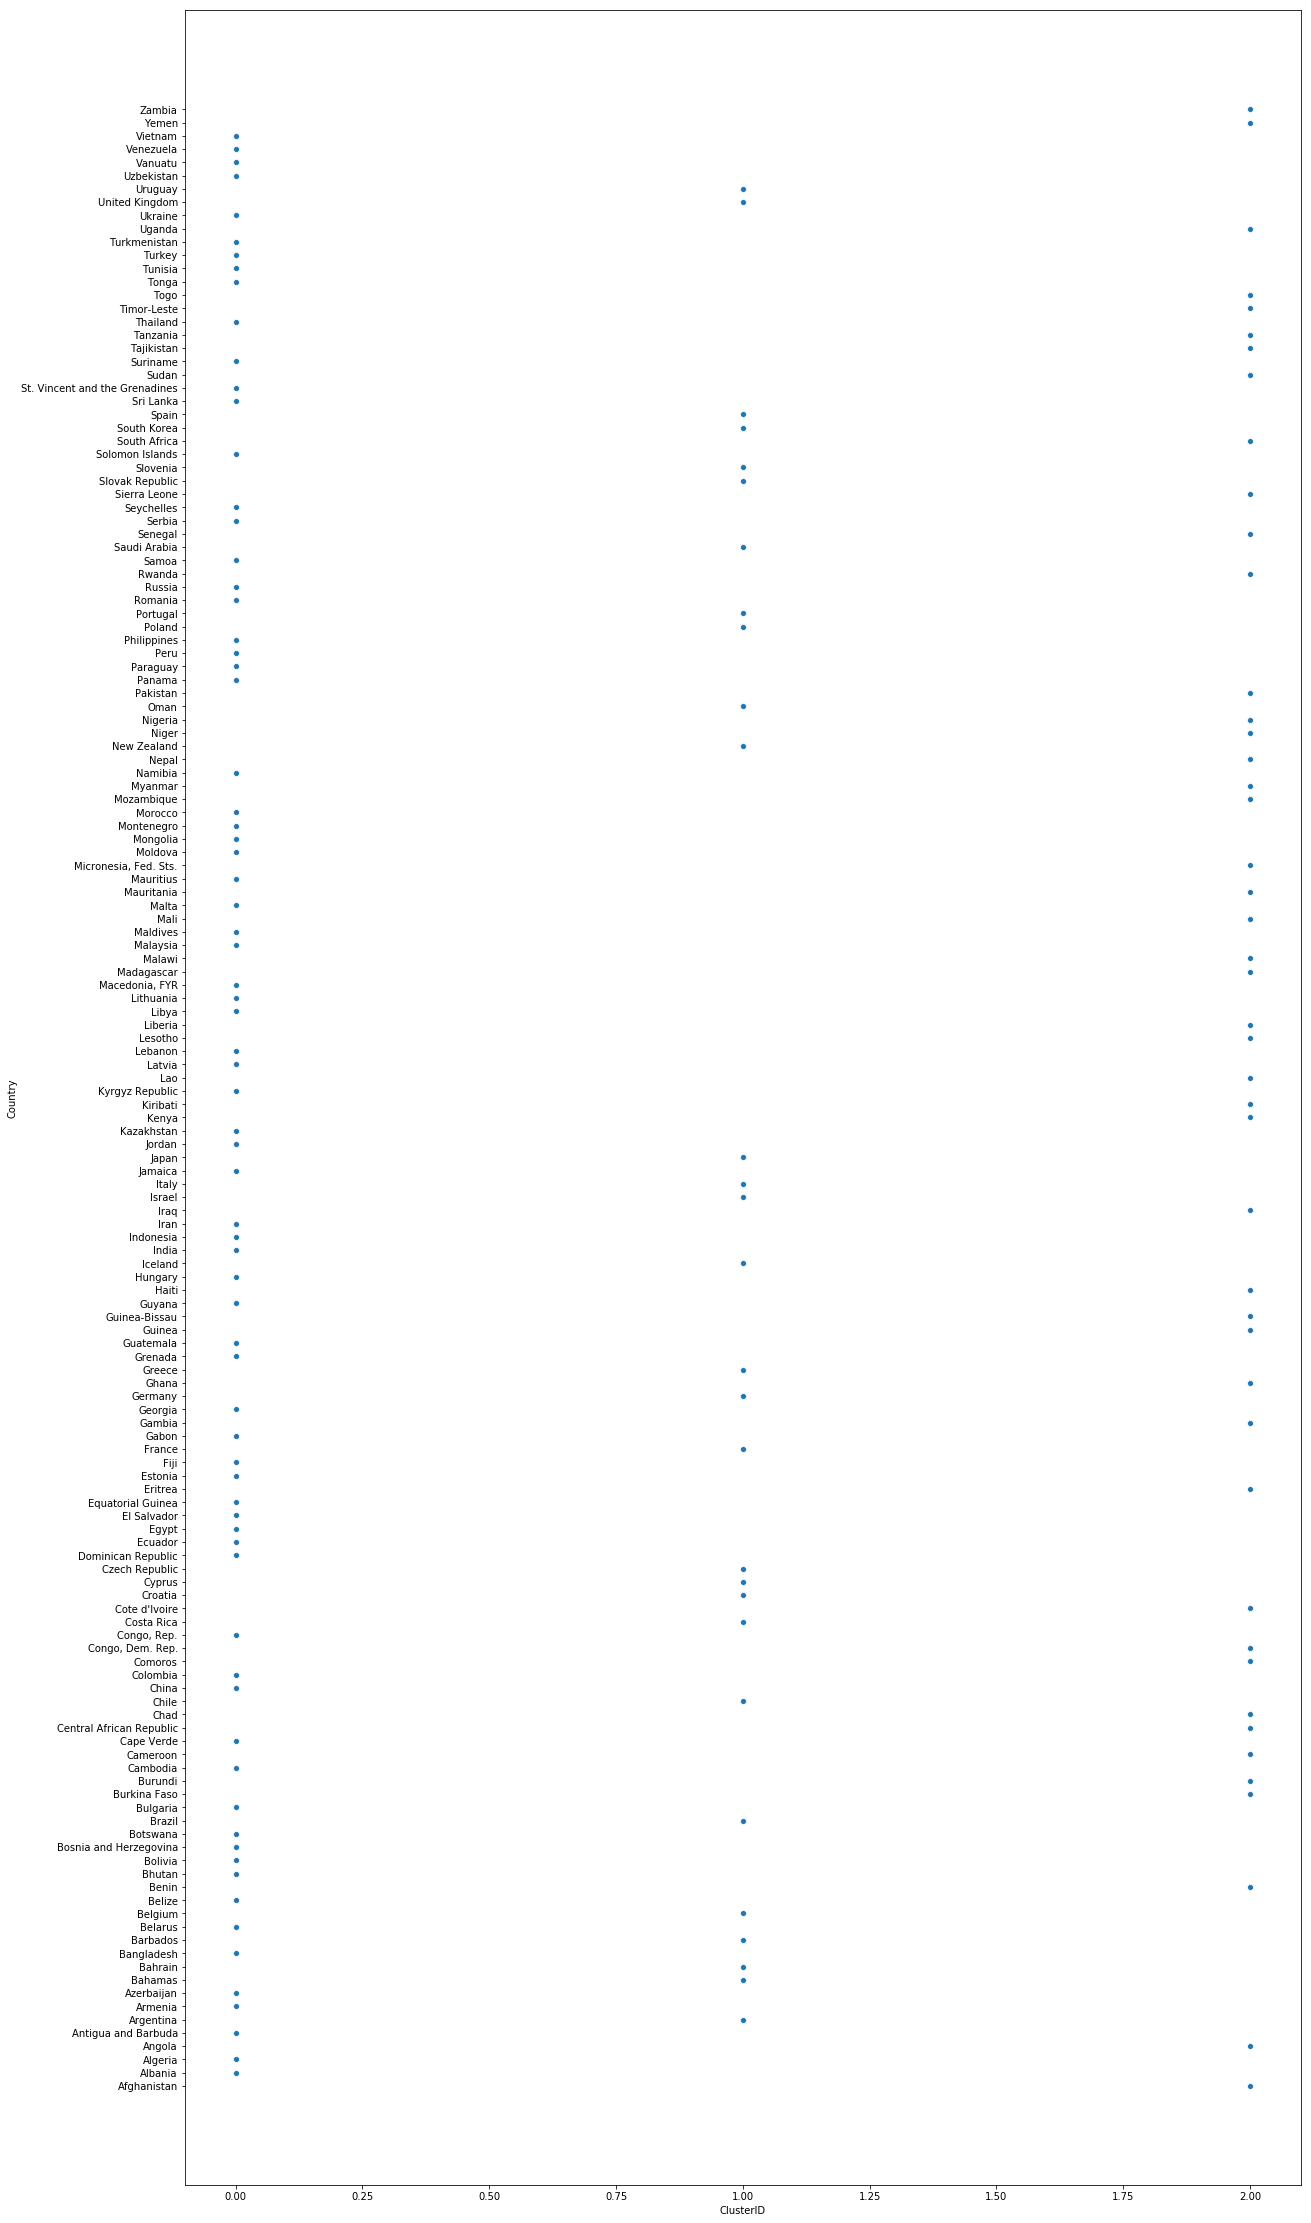

In [32]:
# Now let's plot country vs cluster to find which countries are in which cluster 
plt.figure(figsize=(20,40))
sns.scatterplot(x=countries_km.ClusterID, y=countries_km.Country)

##### Visualising the Clusters on basis of original variables

<Figure size 1080x720 with 0 Axes>

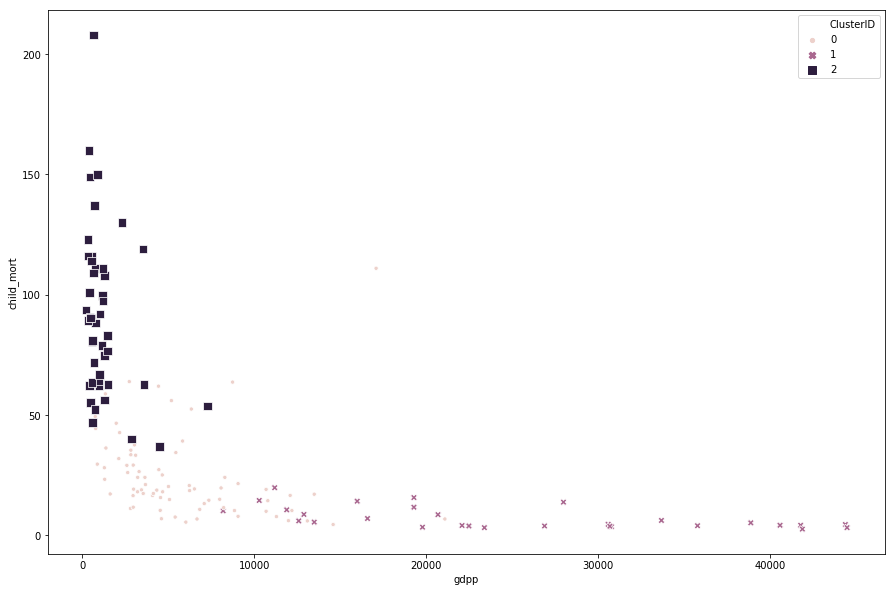

In [41]:
plt.figure(figsize=(15,10))
plot1 = sns.scatterplot(x=countries_df.gdpp, y=countries_df.child_mort, hue=countries_km.ClusterID,size=countries_km.ClusterID,style=countries_km.ClusterID)


#### Observation:- Cluster 2 has high child mortality and lower gdpp

<Figure size 1080x720 with 0 Axes>

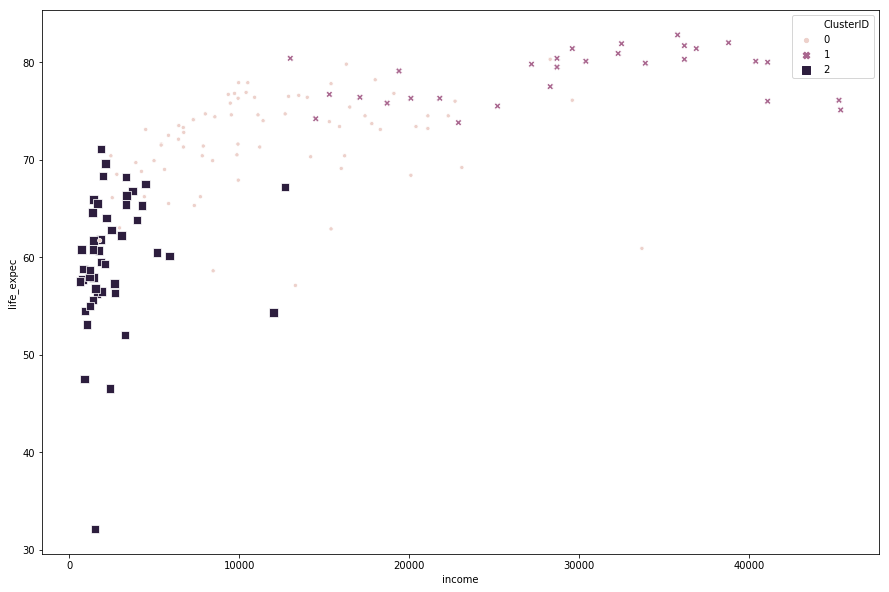

In [34]:
plt.figure(figsize=(15,10))
plot1 = sns.scatterplot(x=countries_df.income, y=countries_df.life_expec, hue=countries_km.ClusterID,size=countries_km.ClusterID,style=countries_km.ClusterID)


#### Observation:- Cluster 2 has low life expectancy and lower net income per person

#### From the above KMeans Clustering the cluster with Cluster Id 2 is the cluster having countries that are highly underdeveloped.

This Cluster contains countries 
##### Afghanistan , Angola, Benin, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Cote d'Ivoire, Eritrea, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania,  Micronesia, Fed. Sts., Mozambique, Myanmar, Nepal, Niger, Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone, South Africa, Sudan, Tajikistan, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia  

### Step 4(b) : Hierarchical Clustering

Now let's perform Hierarchical Clustering on components

<Figure size 2880x1440 with 0 Axes>

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [25.0, 25.0, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [37.5, 37.5, 82.5, 82.5],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [130.0, 130.0, 170.0, 170.0],
  [105.0, 105.0, 150.0, 150.0],
  [60.0, 60.0, 127.5, 127.5],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [200.0, 200.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [210.0, 210.0, 250.0, 250.0],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [280.0, 280.0, 310.0, 310.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [375.0, 375.0, 385.0, 385.0],
  [395.0, 395.0, 405.0, 405.

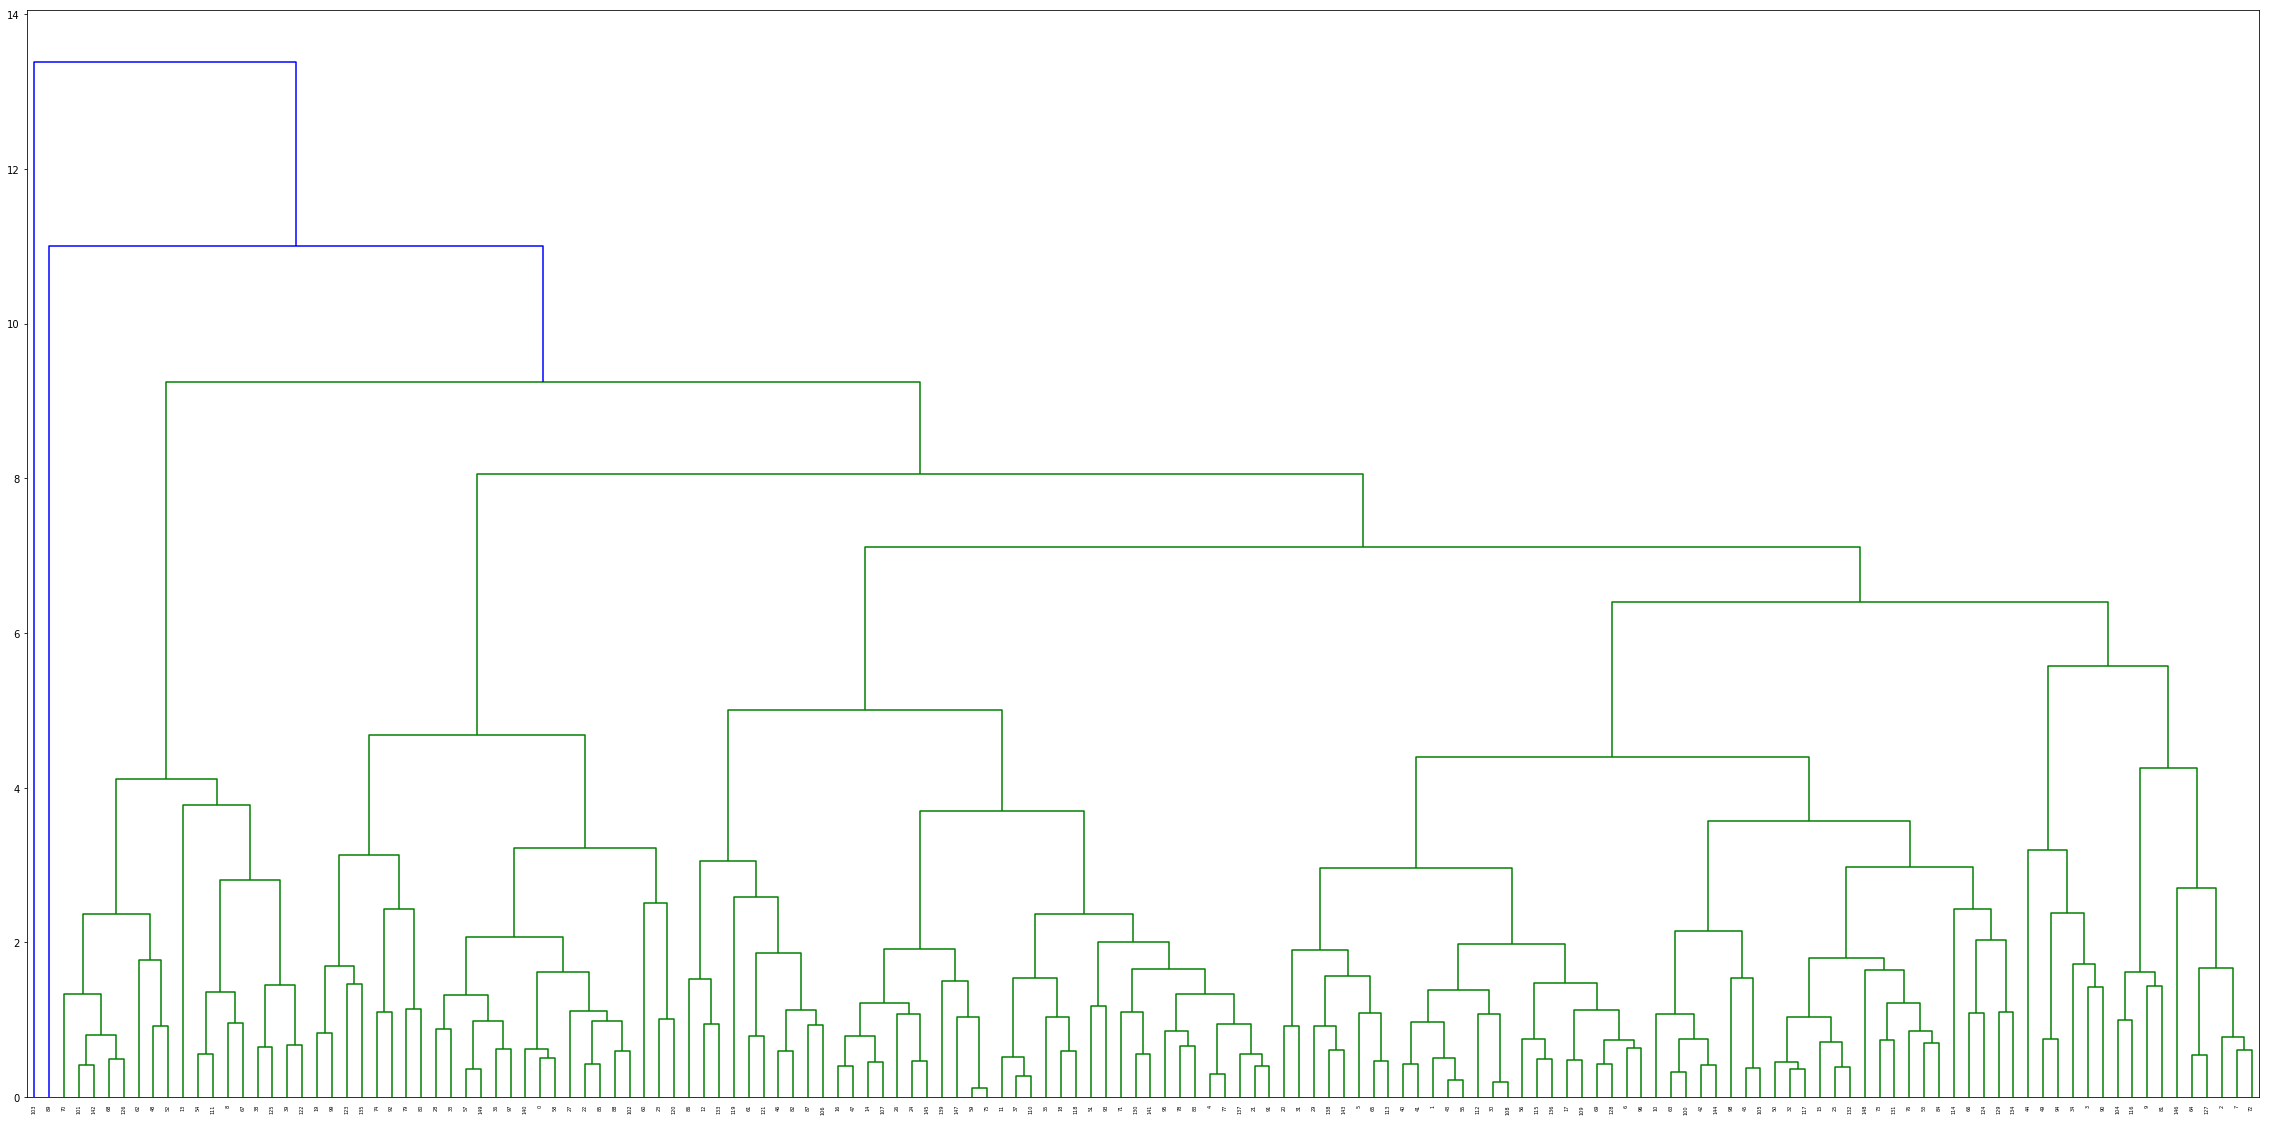

In [35]:
# To perform Hierarchical clustering include the following packages
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Let's draw a dendrogram with complete linkage and see our Agglomerative clustering mergings
plt.figure(figsize=(40,20))
mergings = linkage(pca_final_df, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [43]:
# The business justification says we need to break into 3well formed popular clusters
# representing under developed, developing and developed countries.
# but on observing thel inkage we find that we get three well defined populated clusters
# in the dendrogram only when we take atleast 5 clusters becuase two of these 5 clusters
# captures outlier countries and have 1 and 4 countries. o it makes sense to tkae 5 as no of
# clusters for Hierachical Clustering

# Cutting the tree at 5 clusters
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))

# Concatenating the cluster ids with pca componenets and countries data frame
countries_hc = pd.concat([pca_with_countries_df, clusterCut], axis=1)
countries_hc.columns = ['Country', 'PC1', 'PC2', 'PC3','PC4', 'ClusterID']


##### Visualising the Components

Now, let's visualise the first and second Components from PCA

<Figure size 1080x720 with 0 Axes>

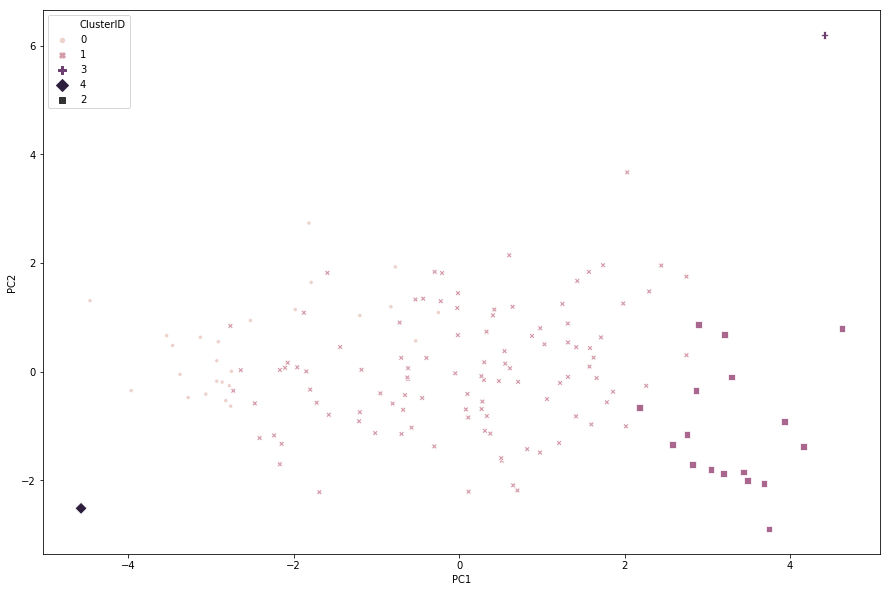

In [37]:
# First Component and Second Component with Cluster ID

plt.figure(figsize=(15,10))
plot1 = sns.scatterplot(x=countries_hc.PC1, y=countries_hc.PC2, hue=countries_hc.ClusterID,size=countries_hc.ClusterID,style=countries_hc.ClusterID)


As you can see we have 0,1 and 2 as three well populated clusters. 3 and 4 contain one country each

<Figure size 1440x2880 with 0 Axes>

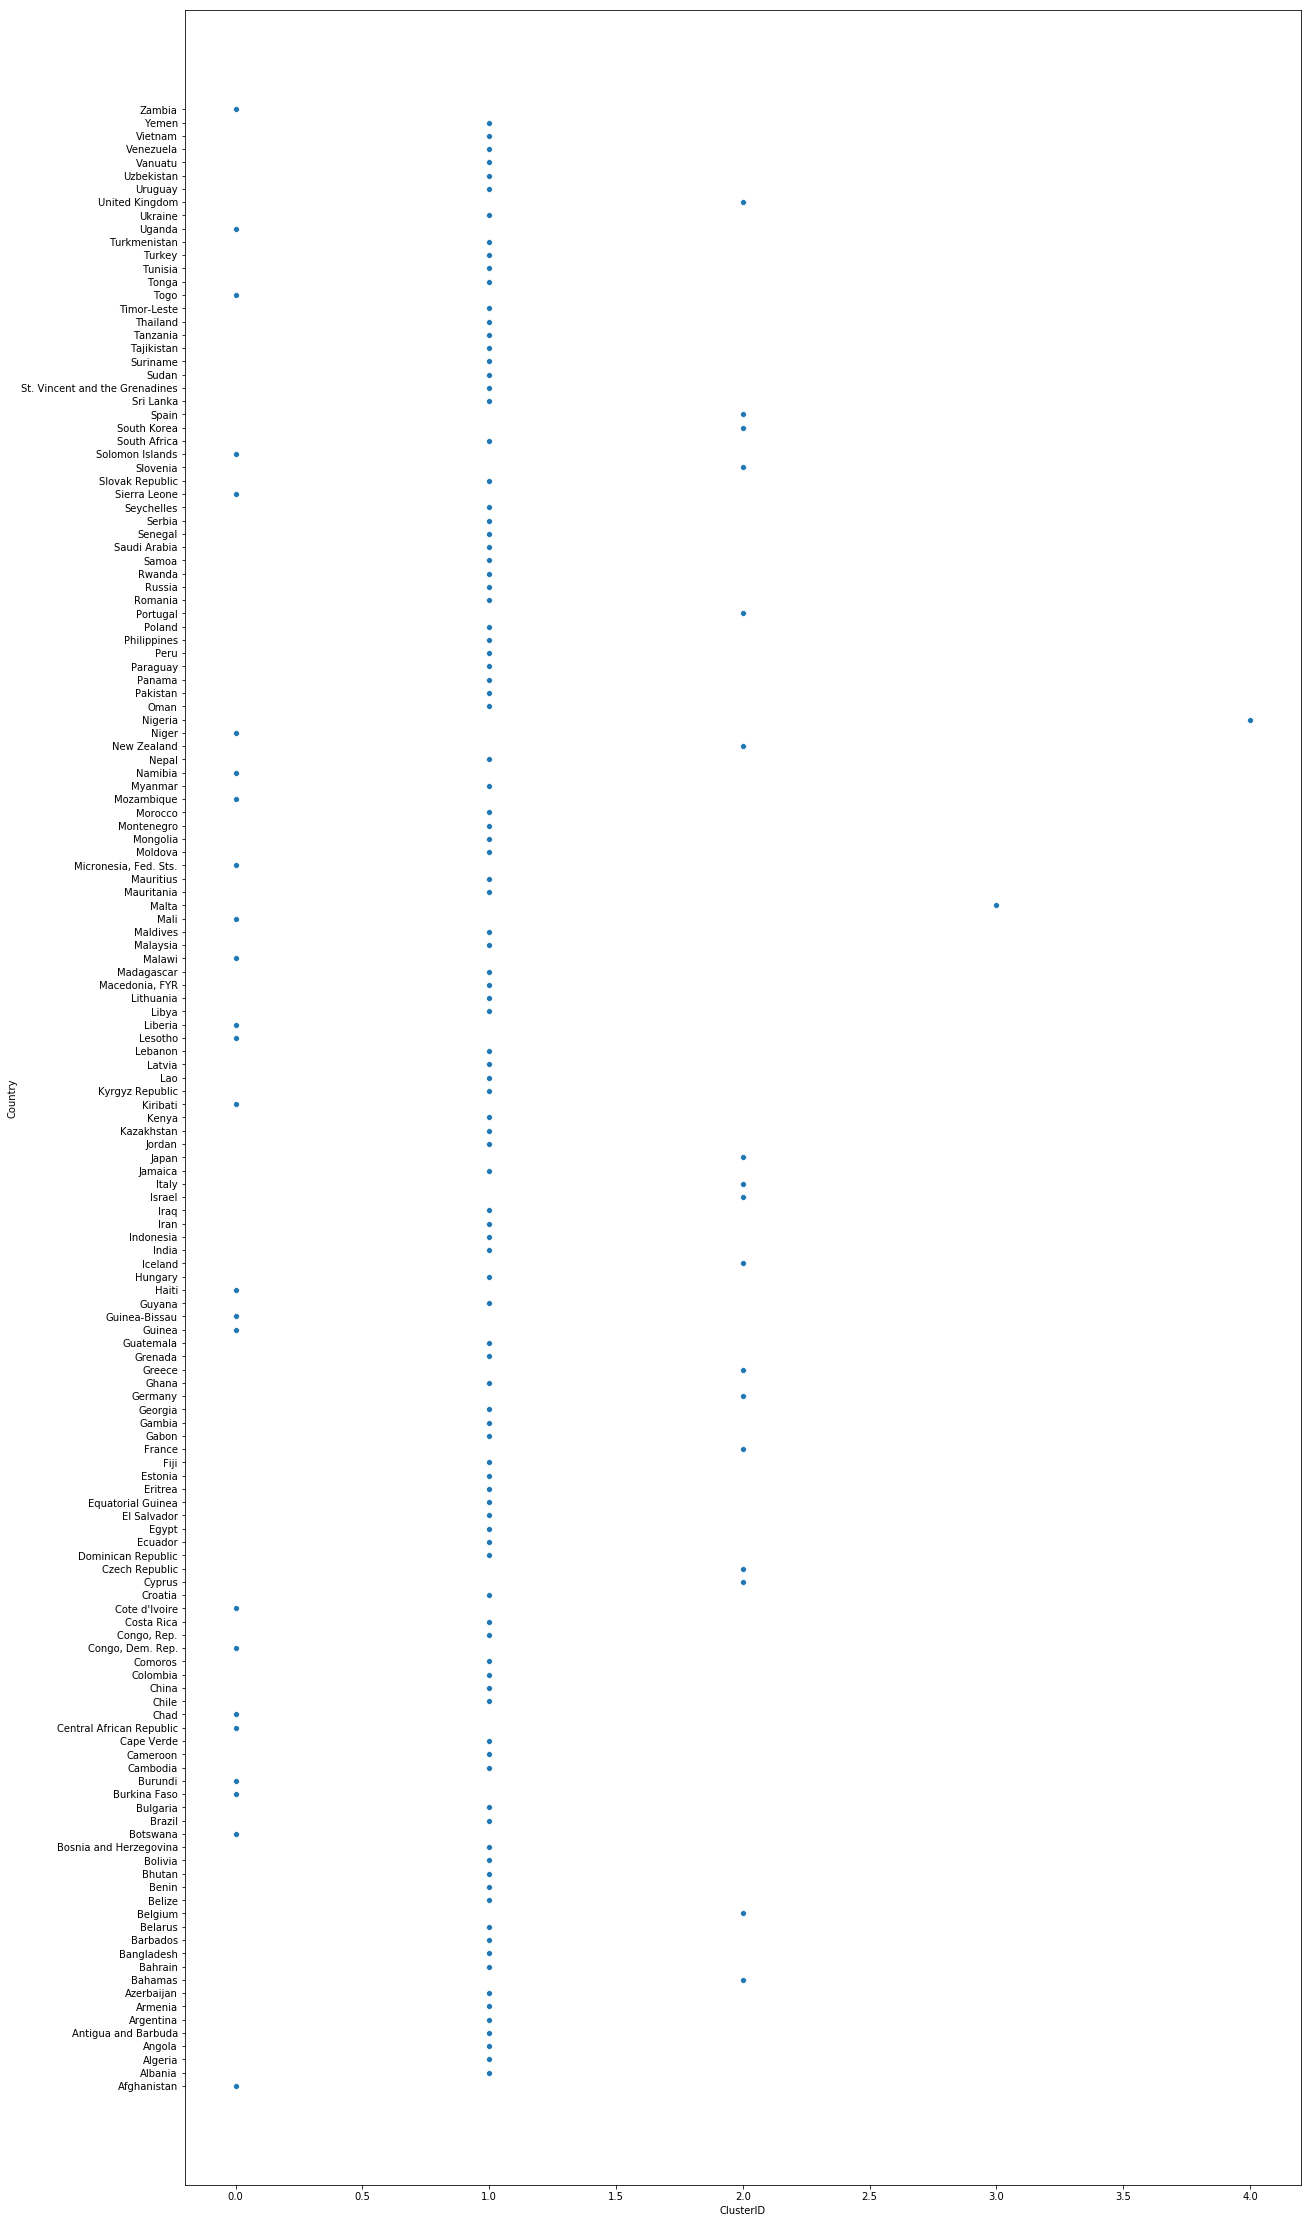

In [38]:
# Now let's plot country vs cluster to find which countries are in which cluster
plt.figure(figsize=(20,40))
sns.scatterplot(x=countries_hc.ClusterID, y=countries_hc.Country)

##### Visualising the original variables

<Figure size 1080x720 with 0 Axes>

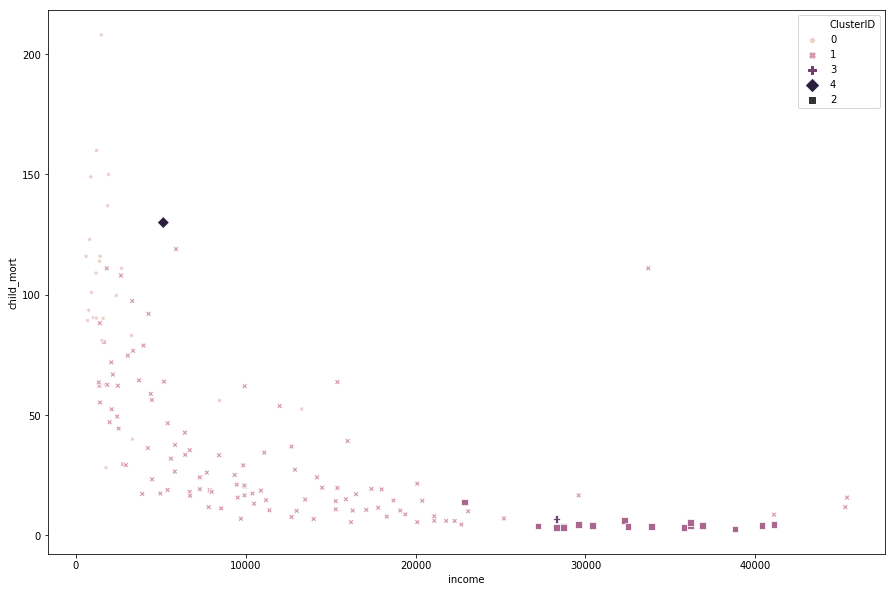

In [39]:
plt.figure(figsize=(15,10))
plot1 = sns.scatterplot(x=countries_df.income, y=countries_df.child_mort, hue=countries_hc.ClusterID,size=countries_hc.ClusterID,style=countries_hc.ClusterID)


#### Observation:- Cluster 0 has high child mortality and less net income per person

<Figure size 1080x720 with 0 Axes>

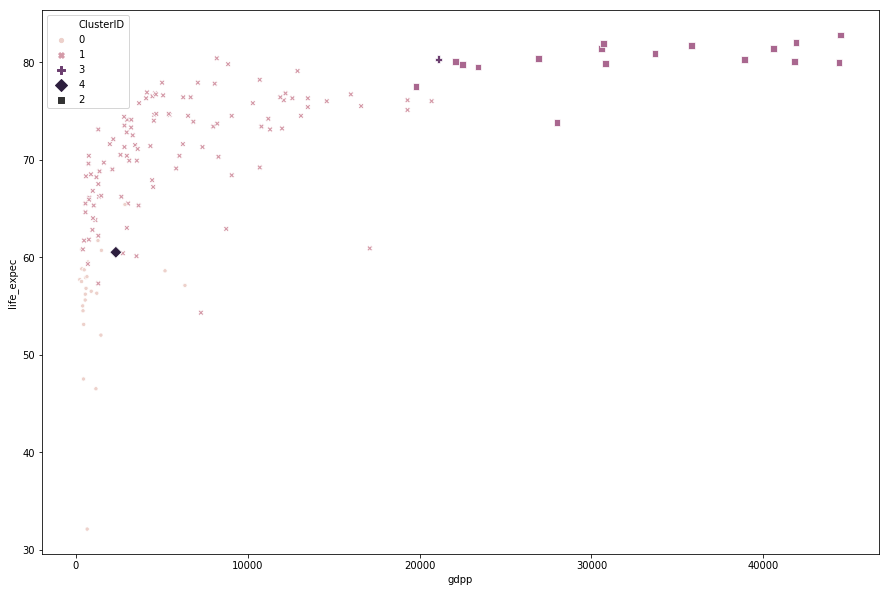

In [40]:
plt.figure(figsize=(15,10))
plot1 = sns.scatterplot(x=countries_df.gdpp, y=countries_df.life_expec, hue=countries_hc.ClusterID,size=countries_hc.ClusterID,style=countries_hc.ClusterID)


#### Observation:- Cluster 0 has low life expectancy and lower gdpp

From the above Hierachical Clustering the cluster with Cluster Id 0 is the cluster having countries that are highly underdeveloped.

This Cluster contains countries 
##### Afghanistan, Botswana,Burkina Faso, Burundi, Central African Republic, Chad, Congo, Dem. Rep., Cote d'Ivoire, Guinea, Guinea-Bissau, Haiti, Kiribati, Lesotho, Liberia Malawi,Mali, Micronesia, Fed.Sts., Mozambique, Namibia, Niger, Sierra Leone, Solomon Islands, Togo, Uganda, Zambia

#### The final list of countries that are recommend after analyses is:- Afghanistan, Central African Republic, Chad, Congo Democratic Republic, Haiti, Sierra Leone, Niger.

